In [29]:
import sys
import SimpleITK as sitk
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline 
import numpy as np
import os
import fnmatch
import shutil
from ipywidgets import interact, fixed
import pandas as pd
import warnings
from skimage import exposure
from skimage import data
from skimage.transform import rotate
import _pickle as cPickle

def myshow(image_arr,slice_n):
    plt.imshow(image_arr[slice_n,:,:],cmap='gray')
    plt.show()

In [33]:
#Read Pickle files

t2_df = pd.read_pickle('./t2_pickle')
adc_df = pd.read_pickle('./adc_pickle')
bval_df = pd.read_pickle('./bval_pickle')
ktrans_df = pd.read_pickle('./ktrans_pickle')

t2_df.name = 't2 modality'
adc_df.name = 'adc modality'
bval_df.name = 'bval modality'
ktrans_df.name = 'ktrans modality'

### Soft EDA before augmentation 

In [34]:
#Starting Rotations 
#we have 81 Cancer Cases for t2 Modality 
#68 for adc and 68 for bval 
#and 73 for the ktrans modality 

def describe_df(data, column, what_describe = ''):
    
    print('{} for {}\n'.format(what_describe, data.name))
    print(data.loc[:,column].value_counts(), '\n\n\n')
    

frames = [t2_df, adc_df, bval_df, ktrans_df]


#describe biopsy findings 

for i in frames:
    describe_df(i, 'ClinSig', 'Cancer or Not')

Cancer or Not for t2 modality

False    266
True      81
Name: ClinSig, dtype: int64 



Cancer or Not for adc modality

False    247
True      68
Name: ClinSig, dtype: int64 



Cancer or Not for bval modality

False    247
True      68
Name: ClinSig, dtype: int64 



Cancer or Not for ktrans modality

False    253
True      73
Name: ClinSig, dtype: int64 





In [86]:
#we need to rotate images with cancer biopsy findings to balance our data and to reduce overfitting 

def rotate_cancers(data,rotate_degree,columns = ['ClinSig', 'patches'], name_of_new_column='rotate'):
    
    new_dict ={}
    #new_dict['patches'] = np.ndarray([])
    
    for i in range(len(data.patches)):
        print('we are in loop')
        try:
            if data.loc[i, 'ClinSig']==True:
                print('clinsig is true')
                image = data.loc[i,'patches']
                print('have image') 
                new_dict[i]=rotate(image , rotate_degree)
                print('success')
            else:
                print('not cancer')
                continue 
        except:
            KeyError
    return new_dict

In [88]:
rotate_45_t2 = rotate_cancers(t2_df, 45, name_of_new_column='rotate 45')
rotate_90_t2 = rotate_cancers(t2_df, 90)
rotate_180_t2 = rotate_cancers(t2_df, 180)
rotate_270_t2 = 

we are in loop
clinsig is true
have image
success
we are in loop
not cancer
we are in loop
not cancer
we are in loop
not cancer
we are in loop
clinsig is true
have image
success
we are in loop
not cancer
we are in loop
not cancer
we are in loop
not cancer
we are in loop
not cancer
we are in loop
clinsig is true
have image
success
we are in loop
clinsig is true
have image
success
we are in loop
not cancer
we are in loop
not cancer
we are in loop
not cancer
we are in loop
not cancer
we are in loop
not cancer
we are in loop
not cancer
we are in loop
not cancer
we are in loop
not cancer
we are in loop
not cancer
we are in loop
not cancer
we are in loop
not cancer
we are in loop
not cancer
we are in loop
clinsig is true
have image
success
we are in loop
not cancer
we are in loop
not cancer
we are in loop
clinsig is true
have image
success
we are in loop
clinsig is true
have image
success
we are in loop
clinsig is true
have image
success
we are in loop
not cancer
we are in loop
not cancer
we

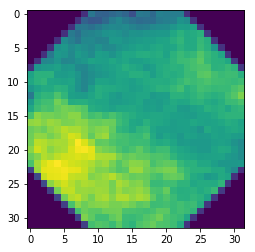

'rotate45'

In [46]:
a = rotate(t2_df.loc[0, 'patches'], 45)

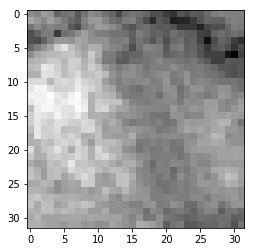

In [50]:
plt.imshow(t2_df.loc[0, 'patches'], cmap='gray')

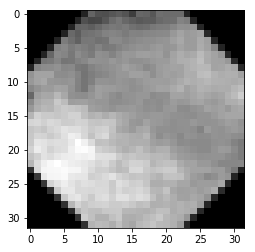

In [48]:
plt.imshow(a, cmap = 'gray')

array([[0.93299276, 0.8624752 , 0.78590417, ..., 0.48794895, 0.49407313,
        0.54415232],
       [0.97106869, 0.92455732, 0.76194125, ..., 0.58638089, 0.54701548,
        0.56122085],
       [0.89684542, 0.89807969, 0.76194125, ..., 0.56688226, 0.5354611 ,
        0.49858715],
       ...,
       [0.82919166, 0.88420662, 0.8956147 , ..., 0.72205268, 0.74679194,
        0.72858667],
       [0.8956147 , 0.93299276, 0.9642334 , ..., 0.76710373, 0.63227965,
        0.56547167],
       [0.96142061, 0.97968272, 0.99643057, ..., 0.64149338, 0.63493517,
        0.66690241]])